# **Preprocessing**

In [ ]:
# Installing prerequisites
!sudo apt install build-essential python3-dev swig git libosmesa6-dev libgl1-mesa-glx libglfw3 python3-pip graphviz
!sudo pip3 install ale-py atari-py AutoROM.accept-rom-license lz4 opencv-python pyvirtualdisplay pyglet importlib-resources Cython cffi glfw imageio lockfile pycparser pillow zipp gym
!sudo pip3 install sklearn graphviz matplotlib pandas tqdm
!git clone https://github.com/wau/keras-rl2.git
%cd keras-rl2
!sudo pip3 install .

Reading package lists... Done
Building dependency tree       
Reading state information... Done
build-essential is already the newest version (12.4ubuntu1).
graphviz is already the newest version (2.40.1-2).
libglfw3 is already the newest version (3.2.1-1).
swig is already the newest version (3.0.12-1).
git is already the newest version (1:2.17.1-1ubuntu0.11).
libgl1-mesa-glx is already the newest version (20.0.8-0ubuntu1~18.04.1).
libosmesa6-dev is already the newest version (20.0.8-0ubuntu1~18.04.1).
python3-dev is already the newest version (3.6.7-1~18.04).
python3-pip is already the newest version (9.0.1-2.3~ubuntu1.18.04.5).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-pyt

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Ericsson-RL-Interpretability

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Ericsson-RL-Interpretability


In [ ]:
import gym

from src import algo
from tensorflow import keras

# **Creation of Environment**

## **SimpleMaze_v0** 

Inputs
-------
X[0]  -  x-index  
X[1]  - y-index  
X[2]  - start  
X[3]  -  goal  
X[4]  -  flag  
X[5]  -  start_north  
X[6]  -  goal_north  
X[7]  -  flag_north  
X[8]  -  start_south  
X[9]  -  goal_south  
X[10] -  flag_south  
X[11] -  start_east  
X[12] -  goal_east  
X[13] -  flag_east  
X[14] -  start_west  
X[15] - goal_west  
X[16] - flag_west  
X[17] - nb_flags  

Outputs
--------
Y[0] -  move up  
Y[1] -  move down  
Y[2] -  move left  
Y[3] -  move right 

In [ ]:
# Creating the environment
from env.SimpleMaze_v0 import SimpleMaze
env = SimpleMaze(True)

Map:
0 0 0 0 
* X 0 * 
0 G * 0 
0 * 0 0 


In [ ]:
modelname = "models/SimpleMaze_v0_DQN_Eps_50000"
filename = "data/SimpleMaze_v0_DQN_Eps_50000.csv"

## **SimpleMaze_v1** 

Inputs
-------
X[0]  -  x-index  
X[1]  - y-index  
X[2]  - start  
X[3]  -  goal  
X[4]  -  flag  
X[5]  -  start_north  
X[6]  -  goal_north  
X[7]  -  flag_north  
X[8]  -  start_south  
X[9]  -  goal_south  
X[10] -  flag_south  
X[11] -  start_east  
X[12] -  goal_east  
X[13] -  flag_east  
X[14] -  start_west  
X[15] - goal_west  
X[16] - flag_west  
X[17] - nb_flags  

Outputs
--------
Y[0] -  move up  
Y[1] -  move down  
Y[2] -  move left  
Y[3] -  move right 

In [ ]:
# Creating the environment
from env.SimpleMaze_v1 import SimpleMaze
env = SimpleMaze(5,5,True)

Map:
0 * 0 * G 
0 0 0 0 * 
0 0 0 0 0 
0 0 0 0 0 
X 0 * * 0 


In [ ]:
modelname = "models/SimpleMaze_v1_DQN_5_5_Eps_50000"
filename = "data/SimpleMaze_v1_DQN_5_5_Eps_50000.csv"

## **CartPole-v1** 

Inputs
-------
X[0] -  Cart Position  
X[1] -  Cart Velocity  
X[2] -  Pole Angle  
X[3] -  Pole Angular Velocity  

Outputs
--------
Y[0] -  Push cart to the left  
Y[1] -  Push cart to the right

In [ ]:
# Creating the environment
env = gym.make("CartPole-v1")

In [ ]:
modelname = "models/CartPole_v1_Eps_50000"
filename = "data/CartPole_v1_Eps_50000.csv"

## **FrozenLake-v0** 

Inputs
-------
X[0] -  a numerical value representing the agent’s current position
in row-major ordering

Outputs
--------
Y[0] -  Move left  
Y[1] -  Move down
Y[2] -  Move right
Y[3] -  Move up

In [ ]:
# Creating the environment
env = gym.make("FrozenLake-v0")

In [ ]:
modelname = "models/FrozenLake_v0_Eps_50000"
filename = "data/FrozenLake_v0_Eps_50000.csv"

# **ANN to DT Conversion**

In [ ]:
# Generating the model - DQN using Epsilon-Greedy Policy for 50,000 steps
model, agent, train_rewards = algo.dqn(env)
model.save(modelname)

Training for 50000 steps ...
Interval 1 (0 steps performed)
    1/10000 [..............................] - ETA: 26:02 - reward: -1.0000

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


10000/10000 [==============================] - 63s 6ms/step - reward: -1.6129
114 episodes - episode_reward: -141.605 [-2826.000, 52.000] - loss: 5.739 - mse: 772.416 - mean_q: -26.655

Interval 2 (10000 steps performed)
10000/10000 [==============================] - 65s 6ms/step - reward: -1.1558
289 episodes - episode_reward: -38.159 [-1538.000, 59.000] - loss: 14.037 - mse: 1190.285 - mean_q: -34.421

Interval 3 (20000 steps performed)
10000/10000 [==============================] - 66s 7ms/step - reward: -1.0360
315 episodes - episode_reward: -34.263 [-1087.000, 63.000] - loss: 13.405 - mse: 713.698 - mean_q: -25.853

Interval 4 (30000 steps performed)
10000/10000 [==============================] - 69s 7ms/step - reward: -0.7343
419 episodes - episode_reward: -17.718 [-553.000, 60.000] - loss: 13.318 - mse: 575.129 - mean_q: -23.199

Interval 5 (40000 steps performed)
10000/10000 [==============================] - 70s 7ms/step - reward: -0.5328
done, took 332.757 seconds
INFO:tensor

In [ ]:
# Loading the trained model
model = keras.models.load_model(modelname)

In [ ]:
# Testing the trained model - SimpleMaze
from src.data import output

for i in range(5):
  observation = env.reset()
  done = False
  cum_reward = 0
  steps = 0
  step_max = 100
  flag = 0
  while done == False and steps < step_max:
    action = output(model,observation)
    observation, reward, done, info = env.step(action)
    #env.render()
    cum_reward += reward
    if reward > -1 and reward < 15:
      flag += 1
    steps += 1
  print(f"Episode {i+1} finished in {steps} timesteps with reward {cum_reward}, collecting {flag} flags.")

Episode 1 finished in 100 timesteps with reward -178, collecting 2 flags.
Episode 2 finished in 100 timesteps with reward -186, collecting 1 flags.
Episode 3 finished in 10 timesteps with reward 23, collecting 4 flags.
Episode 4 finished in 10 timesteps with reward 58, collecting 5 flags.
Episode 5 finished in 100 timesteps with reward -174, collecting 2 flags.


In [ ]:
# Testing the trained model - CartPole
from src.data import output

for i in range(5):
  observation = env.reset()
  done = False
  cum_reward = 0
  steps = 0
  step_max = 1000
  while done == False and steps < step_max:
    action = output(model,observation)
    observation, reward, done, info = env.step(action)
    #env.render()
    cum_reward += reward
    steps += 1
  print(f"Episode {i+1} finished in {steps} timesteps with reward {cum_reward}.")

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


Episode 1 finished in 500 timesteps with reward 500.0.
Episode 2 finished in 500 timesteps with reward 500.0.
Episode 3 finished in 500 timesteps with reward 500.0.
Episode 4 finished in 500 timesteps with reward 500.0.
Episode 5 finished in 500 timesteps with reward 500.0.


In [ ]:
# Testing the trained model - FrozenLake
import numpy as np

for i in range(5):
  observation = env.reset()
  done = False
  cum_reward = 0
  steps = 0
  step_max = 100
  while done == False and steps < step_max:
    action = np.argmax(model.predict([observation]))
    observation, reward, done, info = env.step(action)
    cum_reward += reward
    steps += 1
  print(f"Episode {i+1} finished in {steps} timesteps with reward {cum_reward}.")

Episode 1 finished in 18 timesteps with reward 1.0.
Episode 2 finished in 8 timesteps with reward 1.0.
Episode 3 finished in 11 timesteps with reward 0.0.
Episode 4 finished in 17 timesteps with reward 1.0.
Episode 5 finished in 10 timesteps with reward 0.0.


In [ ]:
# Generating dataset for ANN to DT conversion
from src.data import dataset
dataset(env,model,filename)

  0%|          | 0/100000 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,
100%|██████████| 100000/100000 [02:37<00:00, 633.23it/s]


In [ ]:
# Building DT from the dataset
from src.tree import build_tree
Tree = build_tree(env,filename,0.2)

100%|██████████| 20000/20000 [00:01<00:00, 13605.45it/s]

Instances checked: 20000
Predictions matched: 20000
Accuracy: 100.0%


In [ ]:
print(Tree.tree_.max_depth)

2


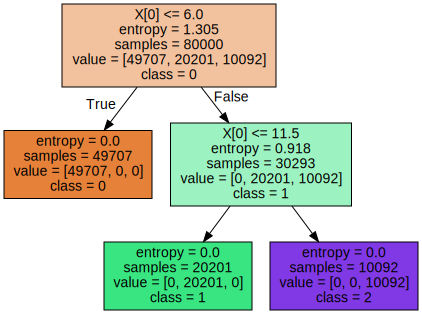

In [ ]:
# Visualizing the DT
from src.tree import visualize_tree
graph = visualize_tree(env,Tree)
graph.render(filename='img/'+filename[5:-4])
graph